In [8]:
#Create a cluster model where drivers grouped together based on driving data
#import dataset
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('driver-data.csv')
data

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


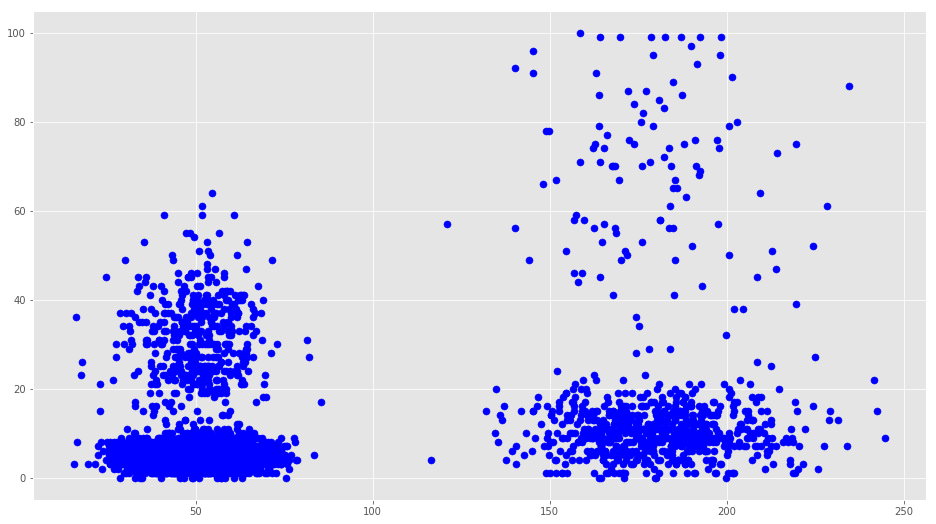

In [9]:
#Getting the values and plotting it
f1 = data['mean_dist_day'].values
f2 = data['mean_over_speed_perc'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c = 'blue', s=50)

In [10]:
#Euclidean distance calculator
def dist(a,b, ax =1):
    return np.linalg.norm(a-b,axis = ax)
#Number of clusters
k =5
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size = k)
#Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size = k)
C = np.array(list(zip(C_x, C_y)),dtype = np.float32)
print(C)

[[121. 221.]
 [ 78.  80.]
 [ 35.  21.]
 [197. 207.]
 [201. 210.]]


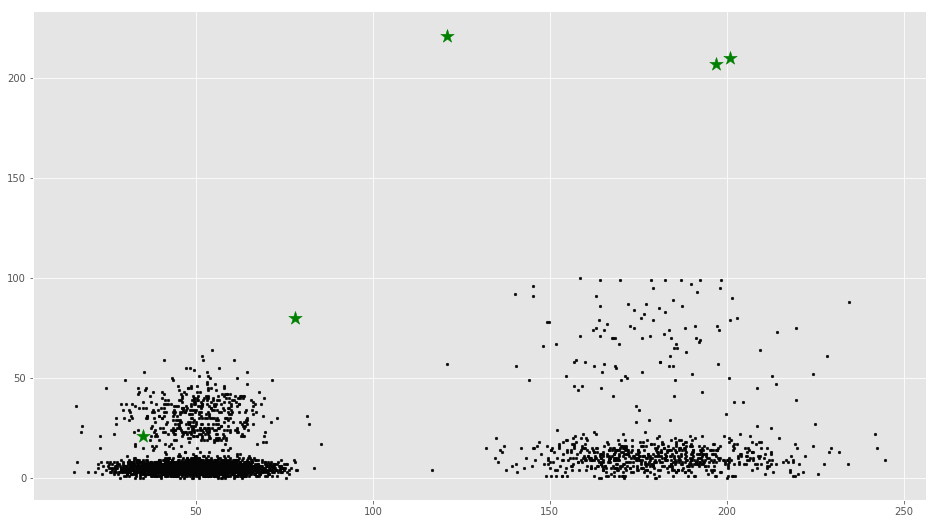

In [11]:
#plotting along with the Centroids
plt.scatter(f1,f2, c = '#050505', s = 7)
plt.scatter(C_x, C_y, marker ='*', s = 200, c = 'g')

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
ax.show()